<a href="https://colab.research.google.com/github/rakkaalhazimi/Covid-19-Prediction-Using-RNN/blob/master/NLP_for_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Teks dengan Python: Metode dan Teknik
Subjek utama dalam Natural Language Processing adalah bagaimana kita membuat program komputer yang dapat mengolah dan menganalisis data dari bahasa manusia (natural language).

Banyak hal yang dapat kita telusuri dari data teks, seperti teks itu sendiri, unsur pembentuk kata/kalimat, kebahasaan atau linguistik, pemaknaan atau leksikal, dan analisis lainnya.

## 1.0 - Akses Data Teks
Data teks bisa kita dapatkan dari berbagai sumber seperti berita, sosial media, kaggle, dan atau bisa kita kumpulkan sendiri.

Kali ini kita coba mengambil data teks berupa UUD45 dari website Mahkamah Konstitusi yang berformat PDF.

In [ ]:
# Download terlebih dahulu library PyPDF2 untuk meng-ekstrak teks dari pdf
!pip install -q PyPDF2

# Bash command untuk mendownload file PDF
!wget -q https://www.mkri.id/public/content/infoumum/regulation/pdf/UUD45%20ASLI.pdf

     |████████████████████████████████| 81kB 8.6MB/s 


In [ ]:
import PyPDF2
import re

pdf = open("UUD45 ASLI.pdf", "rb")
pdf_reader = PyPDF2.PdfFileReader(pdf)

In [ ]:
# Ambil teks di tiap halaman pdf
def get_pdf_text(pdf):
    return "\n".join(page.extractText() for page in pdf.pages)

uud45 = get_pdf_text(pdf_reader)

In [ ]:
# Rapikan teks dengan regular expression (akan dibahas nanti)
def format_linespace(text):
    text = re.sub(r"(\w)(\n)(\w)", r"\1\3", text) # menghilangkan baris diantara kata
    text = re.sub(r"(\n)(-)(\n)", r"\2", text)    # menghilangkan baris diantara tanda "-"
    return text

uud45_clean = format_linespace(uud45)
print(uud45_clean)

 
 
UNDANG-UNDANG DASAR 
NEGARA
 
REPUBLIK INDONESIA 
 
1945
 
 
Pembukaan
 
Bahwa sesungguhnya kemerdekaan itu ialah hak segala bangsa dan oleh sebab itu, maka 
penjajahan diatas dunia harus dihapuskan
,
 
karena tidak sesuai dengan perikemanusiaan 
dan perikeadilan.
 
 
Dan perjuangan pergerakan kemerdekaan Indonesia telah sampailah kepada saat yang 
berbahagia dengan selamat sentosa mengantarkan rakyat Indonesia ke depan pintu 
gerbang kemerdekaan negara Indonesia, yang merdeka, bersatu, berdaulat, adil dan 
makmur.
 
 
Atas berkat rahmat Allah Yang Maha Kuasa dan dengan didorongkan oleh keinginan 
luhur, supaya berkehidupan kebangsaan yang bebas, maka rakyat Indonesia menyatakan 
dengan
 
ini
 
kemerdekaannya.
 
 
Kemudian daripada itu untuk membentuk suatu Pemerintah Negara Indonesia yang 
melindungi segenap bangsa Indonesia dan seluruh tumpah darah Indonesia dan untuk 
memajukan kesejahteraan umum, mencerdaskan kehidupan bangsa, dan ikut 
melaksanakan ketertiban dunia yang berdas

## 2.0 - Tokenisasi
Tokenisasi adalah proses membagi teks yang berupa kalimat, paragraf atau dokumen, menjadi bagian-bagian tertentu.

Misal: 
- Kalimat dipisah-pisah menjadi kumpulan kata.
- Paragraf dipisah-pisah menjadi kumpulan kalimat.
- Dokumen dipisah-pisah menjadi kumpulan paragraf.

Hasil tokenisasi kemudian dipakai untuk proses analisis teks.

In [ ]:
import nltk
# Download package untuk tanda baca dan stopwords
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Ubah teks menjadi kumpulan kata
# .lower() supaya teks jadi lowercase
uud45_tokens = nltk.tokenize.word_tokenize( uud45_clean.lower() ) 

# Filter tanda baca dengan list comprehension
# ambil semua kata yang termasuk alpanumerik .isalnum()
uud45_tokens = [word for word in uud45_tokens if word.isalnum()]

## 3.0 - Wrapper Teks nltk
Data teks yang sebelumnya sudah di tokenisasi dapat dijadikan argumen untuk membuat instance dalam wrapper **nltk.text.Text()**.

Wrapper ini dapat kita pakai untuk melakukan beragam analisis konteks dalam teks.

Macam-macam analisis dapat berupa:
- *Common Contexts*: Konteks yang dipakai suatu kata.
- *Similar* : Kata dengan konteks yang mirip.
- *Collocation*: Kata-kata yang sering muncul bersamaan.
- dll.



In [ ]:
# Masukkan kumpulan kata tadi kedalam wrapper nltk.text.Text
# Wrapper ini digunakan untuk melakukan eksplorasi pada tokens
# yang dimasukkan.
uud45_nltk = nltk.text.Text(uud45_tokens)
uud45_nltk

<Text: dasar negara republik indonesia 1945 pembukaan bahwa sesungguhnya...>

### 3.1 - Common Contexts: Konteks yang dipakai suatu kata



In [ ]:
# Mencari konteks suatu kata
uud45_nltk.common_contexts(["negara"])

### 3.2 - Similar: Kata dengan konteks yang mirip

In [ ]:
# Mencari kata dengan konteks yang mirip
uud45_nltk.similar("negara")

daerah dasar indonesia bangsa dan sebab karena rakyat kebangsaan dalam
kemanusiaan kekuasaan presiden keadaan persidangan kebudayaan
masyarakat sedangkan lingkungannya


### 3.3 - Concordance: Kemunculan kata beserta konteksnya

In [ ]:
# Pencarian kata beserta konteksnya
uud45_nltk.concordance("negara")

Displaying 25 of 121 matches:
                                    negara republik indonesia 1945 pembukaan b
 ke depan pintu gerbang kemerdekaan negara indonesia yang merdeka bersatu berd
tu untuk membentuk suatu pemerintah negara indonesia yang melindungi segenap b
aan indonesia itu dalam suatu dasar negara indonesia yang terbentuk dalam suat
 yang terbentuk dalam suatu susunan negara republik indonesia yang berkedaulat
b i bentuk dan kedaulatan pasal 1 1 negara indonesia ialah negara kesatuan yan
an pasal 1 1 negara indonesia ialah negara kesatuan yang berbentuk republik 2 
 sekali dalam lima tahun di ibukota negara 3 segala putusan majelis permusyawa
kan dasar dan besar dari ada haluan negara bab iii kekuasaan pemerintah negara
negara bab iii kekuasaan pemerintah negara pasal 4 1 presiden republik indones
at perdamaian dan perjanjian dengan negara lain pasal 12 presiden menyatakan k
dan konsul 2 presiden menerima duta negara lain pasal 14 presiden memberi gras
kepada pemerintah bab 

### 3.4 - Collocations: Kata-kata yang sering muncul bersamaan

In [ ]:
# Mencari dua kata yang sering muncul bersama
uud45_nltk.collocations()

dewan perwakilan; perwakilan rakyat; majelis permusyawaratan;
permusyawaratan rakyat; berdasar atas; ditetapkan dengan; oleh karena;
republik indonesia; telah jelas; wakil presiden; warga negara;
keadilan sosial; persetujuan dewan; maha esa; pertimbangan agung; akan
tetapi; hanya memuat; berhubung dengan; dari pada; bertanggung jawab


### 3.5 - Lexical Dispersion plot: Sebaran kata dalam teks/dokumen

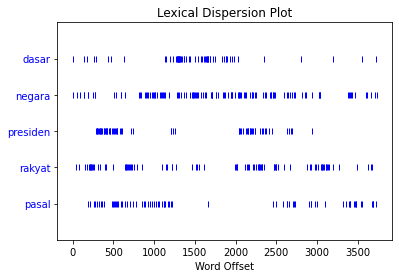

In [ ]:
# Mencari tahu sebaran kata dalam teks.
# Tiap garis menggambarkan kata
# Tiap baris menggambarkan keseluruhan kata (dari awal sampai akhir)
uud45_nltk.dispersion_plot(["dasar", "negara", "presiden", "rakyat", "pasal"])

## 4.0 Jumlah Kata
Selain penelusuran linguistik seperti di atas, kita juga dapat melakukan penelusuran kuantitatif, seperti menghitung jumlah kata yang muncul.

Metode ini diperlukan untuk mengetahui kata apa yang sering muncul pada suatu topik atau dokumen tertentu.

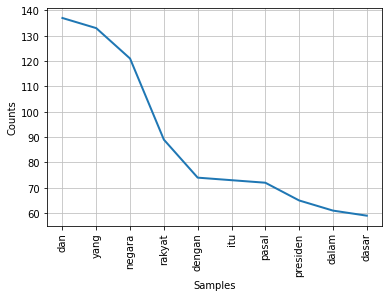

In [ ]:
from nltk import FreqDist

# UUD45 sebelum amandemen
uud45_freq = FreqDist(uud45_tokens)
# Tampilkan 10 kata teratas yang sering digunakan.
uud45_freq.plot(10)

In [ ]:
uud45_freq.most_common(10)

[('dan', 137),
 ('yang', 133),
 ('negara', 121),
 ('rakyat', 89),
 ('dengan', 74),
 ('itu', 73),
 ('pasal', 72),
 ('presiden', 65),
 ('dalam', 61),
 ('dasar', 59)]

### 4.1 Membandingkan jumlah kata dari dua sumber teks yang berbeda
Sekarang kita coba bandingkan jumlah kata antara UUD45 sebelum dan sesudah amandemen.

In [ ]:
# Bash command untuk mendownload file pdf
!wget https://jdih.mkri.id/mg58ufsc89hrsg/UUD_1945_Perubahan.pdf

--2021-06-08 17:41:44--  https://jdih.mkri.id/mg58ufsc89hrsg/UUD_1945_Perubahan.pdf
Resolving jdih.mkri.id (jdih.mkri.id)... 23.212.251.138, 23.212.251.142, 2600:1408:7400::17c8:903a, ...
Connecting to jdih.mkri.id (jdih.mkri.id)|23.212.251.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96855 (95K) [application/pdf]
Saving to: ‘UUD_1945_Perubahan.pdf’

UUD_1945_Perubahan. 100%[===================>]  94.58K  --.-KB/s    in 0.003s  

2021-06-08 17:41:44 (28.4 MB/s) - ‘UUD_1945_Perubahan.pdf’ saved [96855/96855]



Kita akses teksnya seperti pada langkah pertama diatas

In [ ]:
# Buat instance pdf reader
pdf = open("UUD_1945_Perubahan.pdf", "rb")
pdf_reader = PyPDF2.PdfFileReader(pdf)

# Ambil teks dalam pdf
uud45_perubahan = get_pdf_text(pdf_reader)

# Rapikan teks pdf-nya
uud45_perubahan = format_linespace(uud45_perubahan)

# Tokenisasi seperti pada contoh pertama
uud45_perubahan_tokens = nltk.tokenize.word_tokenize( uud45_perubahan.lower() )

# Abaikan tanda baca, ambil huruf atau angka saja
uud45_perubahan_tokens = [word for word in uud45_perubahan_tokens if word.isalnum()]

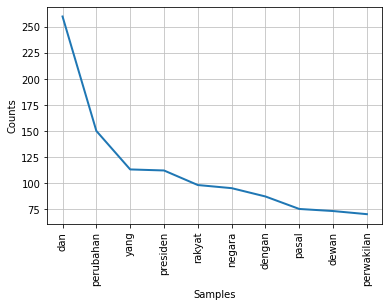

In [ ]:
# Hitung juga 10 kata teratasnya
uud45_perubahan_freq = FreqDist(uud45_perubahan_tokens)
uud45_perubahan_freq.plot(10)

Gunakan **ConditionalFreqDist** untuk menghitung jumlah kata dari beberapa topik/sumber.

In [ ]:
from nltk import ConditionalFreqDist

# Buat dictionary untuk mengarahkan uud45 sebelum dan sesudah amandemen
uud45_dict = {"sebelum": uud45_tokens, 
              "sesudah": uud45_perubahan_tokens}

# Sumber teks kita adalah uud45 sebelum dan sesudah amandemen
conditions = ["sebelum", "sesudah"]

# Kita buat format datanya menjadi tuple (sumber, kata)
# yang mana setiap kata ditemani oleh sumber teksnya.
# seperti (sebelum, dan), (sebelum, dasar), (sesudah, dasar),  dst.
cfd = ConditionalFreqDist(
    (uud, word) for uud in conditions
                for word in uud45_dict[uud])

             dan     yang   negara   rakyat   dengan      itu    pasal presiden    dalam    dasar 
sebelum      137      133      121       89       74       73       72       65       61       59 
sesudah      260      113       95       98       87       19       75      112       64       29 


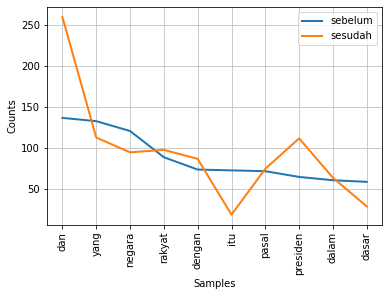

In [ ]:
# Tentukan sampel kata yang ingin dihitung
# disini kita menggunakan 10 kata teratas dari uud45 sebelum amandemen.
sample_words = [word for word, freq in uud45_freq.most_common(10)]

# Tampilan baris dan kolom
cfd.tabulate(samples=sample_words)

# Tampilan grafik
cfd.plot(samples=sample_words)

## 5.0 Mencari Pola dalam Teks
Kita juga dapat secara spesifik mencari kata dengan pola tertentu. Pencarian pola biasanya digunakan untuk mendapatkan informasi mengenai kehadiran suatu kata, mencari kata dengan bentuk yang kompleks, mengubah format teks dsb.

Tugas ini dapat dikerjakan oleh **Regular Expression** yang mana merupakan pola untuk mencocokkan kombinasi karakter dalam teks.

### 5.1 Regular Expression: Mendeteksi kehadiran suatu kata.

In [ ]:
import re
sampel = "Rakka Alhazimi, 11/01/1992, Pria, Kota Magelang"

In [ ]:
nama = r"^\w+ \w+" # Dua kata di awal kalimat dengan batas satu spasi
re.search(nama, sampel)

<re.Match object; span=(0, 14), match='Rakka Alhazimi'>

In [ ]:
tanggal = r"\d+/\d+/\d+" # Tiga kumpulan angka yang dibatasi tanda "/"
re.search(tanggal, sampel)

<re.Match object; span=(16, 26), match='11/01/1992'>

In [ ]:
jenis_kelamin = r"[PW]\w+a" # Kata yang diawali "P" atau "W" dan diakhiri dengan "a"
re.search(jenis_kelamin, sampel)

<re.Match object; span=(28, 32), match='Pria'>

In [ ]:
kota = r"Kota \w+" # Kota <spasi> nama_kota
re.search(kota, sampel)

<re.Match object; span=(34, 47), match='Kota Magelang'>

<h2>Sequence</h2>
<img src="https://regexusingpython.files.wordpress.com/2019/04/0-1.png" width=600>
<h2>Character</h2>
<img src="https://miro.medium.com/max/2964/1*hjsbL45MhT2Tw5DGAYoAUg.png" width=600>

### 5.2 Regular Expression: Mengubah format pada teks.

In [ ]:
contoh_nama = "Rakka Alhazimi" # format first_name last_name

# Akan coba kita ubah ke format last_name first_name
re.sub(r"(\w+) (\w+)", r"\2 \1", contoh_nama)

'Alhazimi Rakka'

In [ ]:
contoh_tanggal = "06/06/2021" # format dd/mm/yyyy

# Akan coba kita ubah ke format mm/dd/yyyy
re.sub(r"(\d+)/(\d+)/(\d+)", r"\2/\1/\3", contoh_tanggal)

'06/06/2021'

### 5.3 Regular Expression: Mencari imbuhan kata 

In [ ]:
# Mencari kata dengan awalan (prefiks) di-
prefiks = re.findall(r"\bdi\w+", uud45_clean)[:10] # tampilkan 10 saja
prefiks

['diatas',
 'dihapuskan',
 'didorongkan',
 'disusunlah',
 'dipimpin',
 'dilakukan',
 'ditambah',
 'ditetapkan',
 'ditetapkan',
 'dibantu']

In [ ]:
# Mencari kata dengan konfiks (awalan dan akhiran) ke-an
konfiks = re.findall(r"\bke\w+an", uud45_clean)[:10]
konfiks

['kemerdekaan',
 'kemerdekaan',
 'kemerdekaan',
 'keinginan',
 'kebangsaan',
 'kemerdekaan',
 'kesejahteraan',
 'kehidupan',
 'ketertiban',
 'kemerdekaan']

In [ ]:
# Mencari kata dengan suffiks (akhiran) -or
suffiks = re.findall(r"\b\w+or\b", uud45_clean)[:10]
suffiks

['diktator']

## 6.0 Klasifikasi Teks
Klasifikasi teks merupakan task dalam NLP yang menggunakan model machine learning untuk melakukan prediksi (forecasting). 

Prediksi disini dilakukan sesuai dengan masalah yang ingin diselesaikan. 

Contoh klasifikasi teks antara lain:
1. Menentukan apakah email yang masuk merupakan spam atau bukan spam.
2. Menentukan apakah ulasan konsumen/pelanggan memiliki sentimen negatif atau positif.
3. Mendeteksi berita asli dan berita bohong.
4. dsb.

###6.1 Machine Learning

Singkatnya, machine learning adalah proses untuk membuat program menggunakan data.

Machine learning merupakan bidang penelitian yang bersifat multidisiplin yang mana merupakan perpaduan antara studi statistik, kecerdasan buatan dan ilmu komputer.

###6.2 Memahami Machine Learning

Paradigma Pemrograman yang biasa kita lakukan adalah memasukkan aturan (program) dan data untuk mendapat hasil yang kita inginkan. Seperti yang kita lakukan tadi.

<img src="https://2.bp.blogspot.com/-fOIxXudK4pc/WmczZVuPWhI/AAAAAAAAC2g/m9me0o64h2sXP4DyiEpcAsLol5DW2SxWACLcBGAs/s1600/1.2.png">

Paradigma machine learning memiliki cara yang berbeda yaitu memasukkan data dan hasil untuk mendapatkan aturan-nya, aturan yang mengikat data dan hasil (input dan output).

Lebih jelasnya, ***di machine learning, kita melatih komputer untuk menjalankan sebuah tugas***. 

Sedangkan **di pemrograman klasik, kita menulis perintah yang akan komputer jalankan.**

###6.3 Bagaimana komputer bisa memahami data?

Komputer mengingat struktur statistik dalam data. Seperti halnya manusia yang menyadari sesuatu yang pernah dia lihat.

Contoh: 
Kita kerap melihat kalau berita bohong sering menggunakan clickbait. Di waktu yang akan datang ketika kita melihat berita dengan clickbait, kemungkinan besar kita berpikir bahwa itu juga berita bohong.

Komputer juga melakukan hal yang sama, namun lebih detail lagi.

### 6.4 Langkah-langkah dalam machine learning
1. Tentukan dulu masalah yang ingin diselesaikan. Misal kita ingin mengetahui email yang spam dan yang bukan spam.

2. Kedua, tentukan tipe masalah yang akan kita hadapi apakah binary classification? multiclass classification? scalar regression? atau clustering?. Masalah yang kita hadapi adalah binary classification, mengklasifikasikan teks menjadi dua grup yang berbeda yaitu spam dan bukan spam.

3. Ketiga, tentukan data input dan data outputnya. Di kasus ini, data inputnya adalah email spam dan bukan spam, sedangkan data outputnya adalah label penanda spam dan bukan spam (0: bukan spam, 1: spam).

3. Keempat, tentukan learning algorithm-nya. Beberapa algoritma belajar untuk binary classification adalah logistic regression, naive bayes, decision-tree, support vector machine dll. Pada materi ini kita memilih algoritma naive bayes yang terbilang sederhana. 

### 6.5 Klasifikasi Email Spam dan Bukan Spam